# Reading and visualizing the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import math

In [4]:
df = pd.read_csv('/Volumes/ADITYA/stock_details/AAPL.csv')

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.447620
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.547977
2,2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.559296
3,2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.454964
4,2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.443031


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 7 columns):
Date         2851 non-null object
High         2851 non-null float64
Low          2851 non-null float64
Open         2851 non-null float64
Close        2851 non-null float64
Volume       2851 non-null float64
Adj Close    2851 non-null float64
dtypes: float64(6), object(1)
memory usage: 156.0+ KB


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


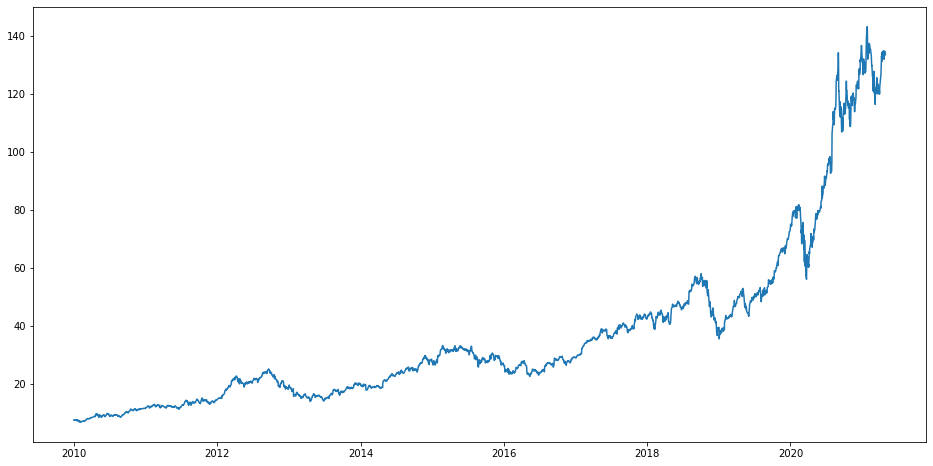

In [7]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2851 entries, 2009-12-31 to 2021-04-29
Data columns (total 7 columns):
Date         2851 non-null datetime64[ns]
High         2851 non-null float64
Low          2851 non-null float64
Open         2851 non-null float64
Close        2851 non-null float64
Volume       2851 non-null float64
Adj Close    2851 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 178.2 KB


In [9]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2009-12-31,2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.447620
2010-01-04,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.547977
2010-01-05,2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.559296
2010-01-06,2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.454964
2010-01-07,2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.443031
...,...,...,...,...,...,...,...
2021-04-23,2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.320007
2021-04-26,2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001
2021-04-27,2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.389999


# Training and testing on the same data to check for accuracy

# Uses a bit more complex Neural Network, Takes A Lot of time to train

In [28]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame()
new_data["Date"]=data["Date"]
new_data["Close"]=data["Close"]
new_data.drop(columns="Date",inplace = True)
#for i in range(0,len(data)):
    #new_data['Date'][i] = data['Date'][i]
    
    #new_data['Close'][i] = data['Close'][i]

#setting index
#new_data.index = new_data.Date
#new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
split = math.floor(0.8*len(dataset))
train = dataset[0:split,:]
valid = dataset[split:,:]#for visualizing actual test vs predicted test values

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#model.add(LSTM(units=50))
#model.add(Dense(1))

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=32)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/100
2220/2220 [==============================] - 16s 7ms/step - loss: 0.0018
Epoch 2/100
2220/2220 [==============================] - 12s 5ms/step - loss: 4.1192e-04
Epoch 3/100
2220/2220 [==============================] - 12s 6ms/step - loss: 3.6885e-04
Epoch 4/100
2220/2220 [==============================] - 13s 6ms/step - loss: 3.2445e-04
Epoch 5/100
2220/2220 [==============================] - 12s 6ms/step - loss: 3.0545e-04
Epoch 6/100
2220/2220 [==============================] - 14s 6ms/step - loss: 2.6920e-04
Epoch 7/100
2220/2220 [==============================] - 14s 6ms/step - loss: 3.1227e-04
Epoch 8/100
2220/2220 [==============================] - 13s 6ms/step - loss: 3.0127e-04
Epoch 9/100
2220/2220 [==============================] - 12s 6ms/step - loss: 2.2375e-04
Epoch 10/100
2220/2220 [==============================] - 12s 6ms/step - loss: 2.2331e-04
Epoch 11/100
2220/2220 [==============================] - 12s 5ms/step - loss: 2.0843e-04
Epoch 12/100
2220/2220 

In [29]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

5.2901373524922155

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


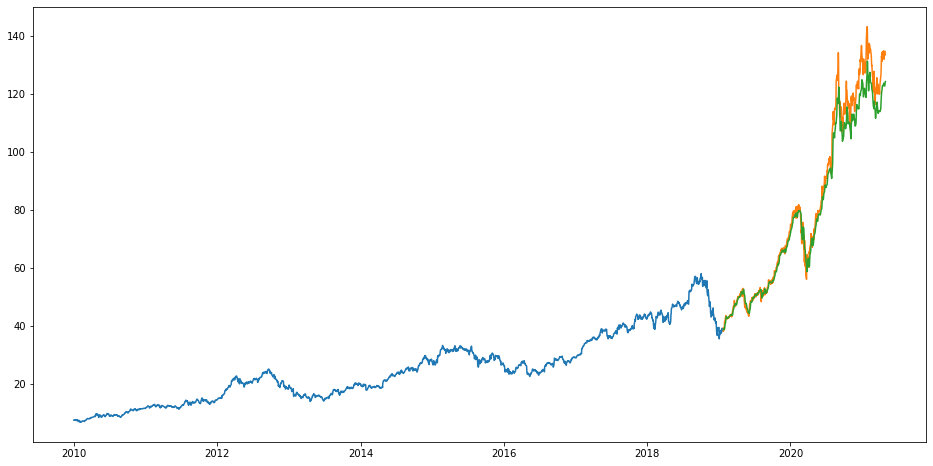

In [30]:
train = new_data[:split]
valid = new_data[split:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# Use the following code to predict new values

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

def Predict(df,days):
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame()
    new_data["Date"]=data["Date"]
    new_data["Close"]=data["Close"]
    #new_data.drop(index=new_data.index[-1],axis=0,inplace=True)
    new_data.drop(columns="Date",inplace = True)
    train = new_data.values
    dataset=train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(train)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    predictions = []
    for j in range(days):
        inputs = dataset[len(dataset) -1 - 60:]
        inputs = inputs.reshape(-1,1)
        inputs  = scaler.transform(inputs)

        X_test = []
        for i in range(60,inputs.shape[0]):
            X_test.append(inputs[i-60:i,0])
        X_test = np.array(X_test)

        X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
        closing_price = model.predict(X_test)
        closing_price = scaler.inverse_transform(closing_price)
        dataset = np.append(dataset,closing_price)
        closing_price = closing_price.tolist()
        closing_price = closing_price[0][0]
        predictions.append(closing_price)
    
    return (predictions)

In [14]:
#df

In [12]:
df = df.iloc[:300,:]

In [13]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2009-12-31,2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.447620
2010-01-04,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.547977
2010-01-05,2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.559296
2010-01-06,2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.454964
2010-01-07,2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.443031
...,...,...,...,...,...,...,...
2011-03-04,2011-03-04,12.867500,12.776786,12.859643,12.857142,453266800.0,11.014771
2011-03-07,2011-03-07,12.916785,12.546785,12.907143,12.691428,546123200.0,10.872802
2011-03-08,2011-03-08,12.764286,12.580358,12.675357,12.705714,356316800.0,10.885046


In [17]:
values= Predict(df,10)

Epoch 1/1
 - 35s - loss: 0.0243


In [19]:
values

[12.186347961425781,
 12.191487312316895,
 12.195626258850098,
 12.197789192199707,
 12.197303771972656,
 12.193826675415039,
 12.187325477600098,
 12.177996635437012,
 12.166196823120117,
 12.152366638183594]